#### Jérémy TREMBLAY

# TP8: CNN

In [38]:
# Import the libraries that will be used in this notebook.
import numpy as np
import seaborn as sns
import os

# Import the pyplot module from matplotlib with the plt alias.
import matplotlib.pyplot as plt

# Other.
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Conv2D, Flatten, Dense, Dropout, MaxPooling2D, BatchNormalization

## Task 1: Load and normalize data

**Consigne :** : Comme dans le TP précédent, proposez une normalisation des données par la valeur maximale d’une images 8 bits, soit 255 afin que chaque valeur de pixel soit € [0, 1]. Cette normalisation doit être faites sur les deux ensembles d’entrées : apprentissage et validation.  
Il sera nécessaire de redimensionner vos images en entrée pour appliquer une couche convolutive.

First, let's load the data.

In [39]:
# Load numbers.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [40]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

The problem here is that the values are not normalized (between 1 and 255 because of the pixel colors).

Let's normalize the data now.

In [41]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

Let's see here.

In [42]:
x_test_normalized[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

It's better now, just black or white. For the fun, we are going to display the number to see data.

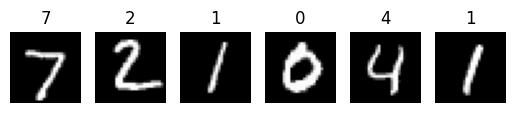

In [43]:
nimages = 6
fig, axs = plt.subplots(1, nimages)
for i in range(nimages):
    label = y_test[i]
    image = x_test_normalized[i]
    pixels = image.reshape((28, 28))
    axs[i].imshow(pixels, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(label)
plt.show()

Let's now resize the images.

In [44]:
# Resize and normalize again.
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

We are ready for the next tasks now.

## Task 2: Create a `get_model` function

**Consigne :** Créer maintenant une fonction get_model_cnn_mnist qui prend en paramètre la géométrie des données de celui-ci et retourne un modèle.
* Il sera composé d’un layer Input qui prendra en paramètre la géométrie des données d’entrée, ici 28 * 28 * 1 (un canal de couleur : niveau de gris).
* Les entrées seront passées à 2 layers `Conv2D` avec chacun un kernel de 3 * 3, un *stride* de 1 et pas de *padding*. Ces layers retourneront respectivement un nombre de 8 et 16 cartes de caractéristiques (*features maps*). Les fonctions d’activations seront des `ReLu`.
* D’un layer `Flatten` qui permet l’aplatissement des données en un vecteur afin de pouvoir connecter correctement nos couches suivantes.
* Puis, de deux layers `Dense`, tous deux composés de fonctions d’activation de type `ReLu` et respectivement 128 et 32 neurones.
* Une couche de `Dropout` après chaque couche cachée.
* Enfin, un dernier layer de type `Dense` avec un nombre de neurones correspondant au nombre de classes à prédire (10). Il s’agira du layer de sortie.

In [45]:
def get_model_cnn_mnist(input_shape=(28, 28, 1), dropout_rate=0.2):
    """
    Creates a Sequential model for classifying hand-written digits using the MNIST dataset.

    Parameters:
    - input_shape (tuple): The shape of input images (default is (28, 28, 1)).
    - dropout_rate (float): The droupout rate used in Droupout (default is 0.2).

    Returns:
    - model (Sequential): The compiled Keras Sequential model.
    """
    model = Sequential()

    # Convolutional layers.
    model.add(Input(shape=input_shape))
    if len(input_shape) == 3:
        model.add(Conv2D(8, kernel_size=(3, 3), strides=1, padding='valid', activation='relu'))
        model.add(Conv2D(16, kernel_size=(3, 3), strides=1, padding='valid', activation='relu'))

    # Flatten layer.
    model.add(Flatten())

    # Dense layers with Dropout.
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout_rate))

    # Output layer.
    num_classes = 10  # Number of classes (digits 0-9).
    model.add(Dense(num_classes, activation='softmax'))

    return model

## Task 3: Train the model

**Consigne :**  Observez le nombre de paramètres de votre modèle avec et sans couche convolutive. Puis, entraînez le avec les paramètres suivants :
* Les données d’entrée de la base d’apprentissage et les prédictions attendues.
* Un nombre d’époque à 20.
* Un batch de taille 512.
* Des données de validation (`validation_data`) qui seront les données de test.
* Une fonction callback de sauvegarde spécifique au modèle.

For the rest of this notebook we will use a `dropout_rate` of 0.2 because in the last notebook we have found that 0.2 is the value that provides the best results for our dataset so we will keep this value. Let's train our model now.

In [46]:
# Create the CNN model without convolutional layers.
model_without_conv = get_model_cnn_mnist(input_shape=(28, 28))
model_without_conv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model without convolutional layers.
history_without_conv = model_without_conv.fit(x_train_normalized, y_train, epochs=20, batch_size=512, validation_data=(x_test_normalized, y_test),
                                              callbacks=[keras.callbacks.ModelCheckpoint('models/mnist/without_conv_best_model.h5', save_best_only=True)])

# Create the CNN model with convolutional layers.
model_with_conv = get_model_cnn_mnist(input_shape=(28, 28, 1))
model_with_conv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with convolutional layers.
history_with_conv = model_with_conv.fit(x_train_normalized, y_train, epochs=20, batch_size=512, validation_data=(x_test_normalized, y_test),
                                        callbacks=[keras.callbacks.ModelCheckpoint('models/mnist/with_conv_best_model.h5', save_best_only=True)])

Epoch 1/20
118/118 [==============================] - 9s 16ms/step - loss: 0.8310 - accuracy: 0.7466 - val_loss: 0.2797 - val_accuracy: 0.9210
Epoch 2/20
  1/118 [..............................] - ETA: 0s - loss: 0.4190 - accuracy: 0.8945

C:\Users\jtrem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


118/118 [==============================] - 2s 13ms/step - loss: 0.3445 - accuracy: 0.9000 - val_loss: 0.1908 - val_accuracy: 0.9429
Epoch 3/20
118/118 [==============================] - 2s 15ms/step - loss: 0.2563 - accuracy: 0.9265 - val_loss: 0.1550 - val_accuracy: 0.9516
Epoch 4/20
118/118 [==============================] - 1s 12ms/step - loss: 0.2135 - accuracy: 0.9393 - val_loss: 0.1328 - val_accuracy: 0.9595
Epoch 5/20
118/118 [==============================] - 2s 14ms/step - loss: 0.1827 - accuracy: 0.9478 - val_loss: 0.1182 - val_accuracy: 0.9626
Epoch 6/20
118/118 [==============================] - 1s 12ms/step - loss: 0.1617 - accuracy: 0.9529 - val_loss: 0.1106 - val_accuracy: 0.9667
Epoch 7/20
118/118 [==============================] - 2s 18ms/step - loss: 0.1448 - accuracy: 0.9585 - val_loss: 0.0973 - val_accuracy: 0.9698
Epoch 8/20
118/118 [==============================] - 2s 16ms/step - loss: 0.1348 - accuracy: 0.9612 - val_loss: 0.0910 - val_accuracy: 0.9721
Epoch 9/20

In [47]:
# Display the number of parameters for the model without convolutional layers.
print("Number of parameters (without conv):", model_without_conv.count_params())

# Display the number of parameters for the model with convolutional layers.
print("Number of parameters (with conv):", model_with_conv.count_params())

Number of parameters (without conv): 104938
Number of parameters (with conv): 1185482


This is a lot of parameter, let's now see the results between the two models.

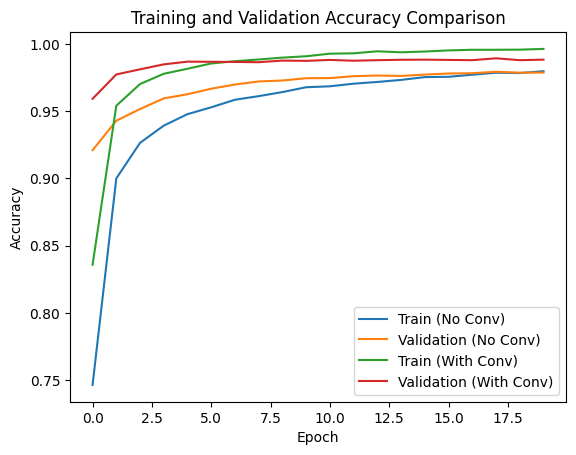

In [48]:
# Plot accuracy for the model without convolutional layers.
plt.plot(history_without_conv.history['accuracy'], label='Train (No Conv)')
plt.plot(history_without_conv.history['val_accuracy'], label='Validation (No Conv)')

# Plot accuracy for the model with convolutional layers.
plt.plot(history_with_conv.history['accuracy'], label='Train (With Conv)')
plt.plot(history_with_conv.history['val_accuracy'], label='Validation (With Conv)')

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Questions

* Quels sont les performances de ce modèle vis-à-vis du précédent ?
* Que pouvez vous souligner sur les performances de ce modèle relativement à son nombre de paramètres ?
* Quelle couche du réseau implique beaucoup de paramètres et pourquoi ?

* The model with convolutional layers shows better performance compared to the previous model without convolution, evident by higher accuracies on both training and validation data (around 98% of accuracy for test data and 99% for train instead of 97% for both test and train data for a model witout convolutional layer).

* Relative to the previous model without convolution, this model with convolutional layers appears to deliver improved accuracy. Convolutional layers likely aided in capturing spatial patterns in the images, enhancing the model's generalization capability.

* The layer with a significant number of parameters is typically the initial convolutional layer. This is due to its use of filters (kernels) to learn spatial features in images. The larger the filter size, the higher the number of parameters associated with this layer (but it creates many parameters). 

## Task 4: create a new model using a *pooling* system

**Consigne :** Créer un nouveau modèle intégrant le principe de *pooling*. Vous pouvez observer le nombre de paramètres de ce modèle une fois créé. Les modifications apportées au modèle seront les suivantes :
* Une couche de `MaxPooling` sera ajoutée après chaque couche `Conv2D`.
* Chaque couche de `MaxPooling` aura un kernel de 2x2.  
Avant de procéder à l’entraînement de notre nouveau modèle. Nous allons ici utiliser `tensorboard` pour visualiser rapidement les performances de notre modèle. 

First, let's define the function to create our now model.

In [49]:
def get_model_cnn_mnist_v2(input_shape=(28, 28, 1), dropout_rate=0.2):
    """
    Creates a Sequential model for classifying hand-written digits using the MNIST dataset with pooling.

    Parameters:
    - input_shape (tuple): The shape of input images (default is (28, 28, 1)).
    - dropout_rate (float): The droupout rate used in Droupout (default is 0.2).

    Returns:
    - model (Sequential): The compiled Keras Sequential model.
    """
    model = Sequential()

    # Convolutional layers with pooling.
    model.add(Input(shape=input_shape))
    if len(input_shape) == 3:
        model.add(Conv2D(8, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten layer.
    model.add(Flatten())

    # Dense layers with Dropout.
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout_rate))

    # Output layer.
    num_classes = 10  # Number of classes (digits 0-9).
    model.add(Dense(num_classes, activation='softmax'))

    return model

Fix the log directory for tensorboard.

In [50]:
# Log directory for TensorBoard.
log_dir = 'logs/cnn_mnist_v2'
os.makedirs(log_dir, exist_ok=True)
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [51]:
# Create the CNN model with convolutional layers with pooling.
model_with_conv_pooling = get_model_cnn_mnist_v2(input_shape=(28, 28, 1))
model_with_conv_pooling.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with convolutional layers.
history_with_conv_pooling = model_with_conv_pooling.fit(x_train_normalized, y_train, epochs=20, batch_size=512, validation_data=(x_test_normalized, y_test),
                                        callbacks=[keras.callbacks.ModelCheckpoint('models/mnist/with_conv_pooling_best_model.h5', save_best_only=True), tensorboard_callback])

Epoch 1/20
118/118 [==============================] - 7s 50ms/step - loss: 0.9211 - accuracy: 0.7031 - val_loss: 0.2043 - val_accuracy: 0.9389
Epoch 2/20
118/118 [==============================] - 5s 42ms/step - loss: 0.2559 - accuracy: 0.9247 - val_loss: 0.1135 - val_accuracy: 0.9656
Epoch 3/20
118/118 [==============================] - 6s 52ms/step - loss: 0.1714 - accuracy: 0.9497 - val_loss: 0.0859 - val_accuracy: 0.9723
Epoch 4/20
118/118 [==============================] - 6s 50ms/step - loss: 0.1348 - accuracy: 0.9603 - val_loss: 0.0647 - val_accuracy: 0.9797
Epoch 5/20
118/118 [==============================] - 5s 45ms/step - loss: 0.1114 - accuracy: 0.9676 - val_loss: 0.0587 - val_accuracy: 0.9813
Epoch 6/20
118/118 [==============================] - 6s 48ms/step - loss: 0.0962 - accuracy: 0.9714 - val_loss: 0.0489 - val_accuracy: 0.9838
Epoch 7/20
118/118 [==============================] - 5s 44ms/step - loss: 0.0854 - accuracy: 0.9750 - val_loss: 0.0433 - val_accuracy: 0.9862

Let's now see how many parameters our model has.

In [52]:
# Display the number of parameters for the new model with convolutional layers and pooling.
print("Number of parameters (without conv):", model_with_conv_pooling.count_params())

Number of parameters (without conv): 57034


It's better than previsously, we pass from 1M parameters to 57k. Let's now compare the performance because we must ensure that we have not loose performance during this process of parameter reduction.

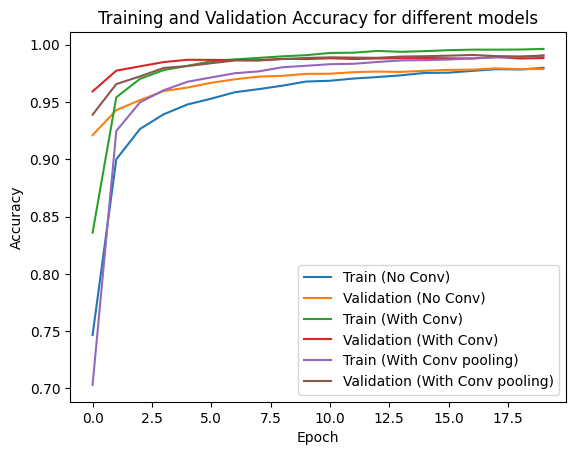

In [53]:
# Plot accuracy for the model without convolutional layers.
plt.plot(history_without_conv.history['accuracy'], label='Train (No Conv)')
plt.plot(history_without_conv.history['val_accuracy'], label='Validation (No Conv)')

# Plot accuracy for the model with convolutional layers.
plt.plot(history_with_conv.history['accuracy'], label='Train (With Conv)')
plt.plot(history_with_conv.history['val_accuracy'], label='Validation (With Conv)')

# Plot accuracy for the model with convolutional layers and pooling.
plt.plot(history_with_conv_pooling.history['accuracy'], label='Train (With Conv pooling)')
plt.plot(history_with_conv_pooling.history['val_accuracy'], label='Validation (With Conv pooling)')

plt.title('Training and Validation Accuracy for different models')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

As before, we can observe the same performance. Nothing has changed, except the number of parameters which is now significantly low than previsouly, so we have a simple model. This is great. Conclusion: use pooling when possible to reduce the number of parameters.

## Task 5: Create a model with dropout

**Consigne :** Nous allons maintenant proposer une 3ème version de notre modèle en y ajoutant du `dropout`. Une fois le modèle créé, vous pouvez l’entraîner. Les modifications au modèle seront les suivantes :  
* Une couche de `Doupout` sera ajoutée après chaque couche de `MaxPooling`. Le pourcentage sera fixé à hauteur de 20%.
* Une couche de `BatchNormalization` sera ajoutée après chaque couche `Conv2D` et `Dense`.
* Les couches `Dropout` après chaque couche `Dense` auront maintenant un pourcentage fixé à hauteur de 50%.
* Un *callback* spécifique pour `tensorboard` sera affecté au modèle lors de son apprentissage.

Let's define the new function.

In [54]:
def get_model_cnn_mnist_v3(input_shape=(28, 28, 1)):
    """
    Creates a Sequential model for classifying hand-written digits using the MNIST dataset with pooling & dropout.

    Parameters:
    - input_shape (tuple): The shape of input images (default is (28, 28, 1)).

    Returns:
    - model (Sequential): The compiled Keras Sequential model.
    """
    model = Sequential()

    # Convolutional layers with pooling.
    model.add(Input(shape=input_shape))
    if len(input_shape) == 3:
        model.add(Conv2D(8, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))
        model.add(Conv2D(16, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))

    # Flatten layer.
    model.add(Flatten())

    # Dense layers with Dropout.
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Output layer.
    num_classes = 10  # Number of classes (digits 0-9).
    model.add(Dense(num_classes, activation='softmax'))

    return model

Fix tensorboard logs.

In [55]:
# Log directory for TensorBoard.
log_dir = 'logs/cnn_mnist_v3'
os.makedirs(log_dir, exist_ok=True)
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

Use the model.

In [56]:
model_with_conv_pooling_dropout = get_model_cnn_mnist_v3()
model_with_conv_pooling_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model with TensorBoard callback.
history_with_conv_pooling_dropout = model_with_conv_pooling_dropout.fit(x_train_normalized, y_train, epochs=20, batch_size=512, validation_data=(x_test_normalized, y_test),
                                        callbacks=[keras.callbacks.ModelCheckpoint('models/mnist/with_conv_pooling_dropout_best_model.h5', save_best_only=True), tensorboard_callback])

Epoch 1/20
118/118 [==============================] - 15s 101ms/step - loss: 1.2534 - accuracy: 0.6033 - val_loss: 2.9120 - val_accuracy: 0.1282
Epoch 2/20
118/118 [==============================] - 9s 76ms/step - loss: 0.5589 - accuracy: 0.8430 - val_loss: 3.3392 - val_accuracy: 0.1929
Epoch 3/20
118/118 [==============================] - 9s 79ms/step - loss: 0.3767 - accuracy: 0.8964 - val_loss: 1.4548 - val_accuracy: 0.6020
Epoch 4/20
118/118 [==============================] - 9s 74ms/step - loss: 0.2854 - accuracy: 0.9236 - val_loss: 0.4575 - val_accuracy: 0.8663
Epoch 5/20
118/118 [==============================] - 10s 85ms/step - loss: 0.2329 - accuracy: 0.9367 - val_loss: 0.1605 - val_accuracy: 0.9547
Epoch 6/20
118/118 [==============================] - 9s 79ms/step - loss: 0.1989 - accuracy: 0.9470 - val_loss: 0.0915 - val_accuracy: 0.9730
Epoch 7/20
118/118 [==============================] - 9s 79ms/step - loss: 0.1772 - accuracy: 0.9525 - val_loss: 0.0656 - val_accuracy: 0.9

Let's now see how many parameters our model has changed (just in case).

In [57]:
# Display the number of parameters for the new model with convolutional layers and pooling and dropout.
print("Number of parameters (without conv):", model_with_conv_pooling_dropout.count_params())

Number of parameters (without conv): 57770


Again, let's compare performance between all models.

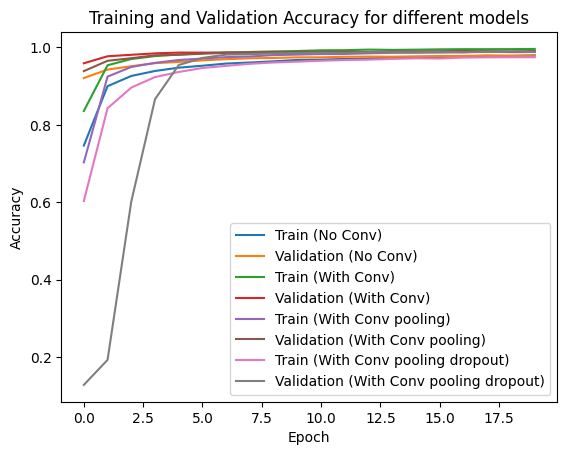

In [58]:
# Plot accuracy for the model without convolutional layers.
plt.plot(history_without_conv.history['accuracy'], label='Train (No Conv)')
plt.plot(history_without_conv.history['val_accuracy'], label='Validation (No Conv)')

# Plot accuracy for the model with convolutional layers.
plt.plot(history_with_conv.history['accuracy'], label='Train (With Conv)')
plt.plot(history_with_conv.history['val_accuracy'], label='Validation (With Conv)')

# Plot accuracy for the model with convolutional layers and pooling.
plt.plot(history_with_conv_pooling.history['accuracy'], label='Train (With Conv pooling)')
plt.plot(history_with_conv_pooling.history['val_accuracy'], label='Validation (With Conv pooling)')

# Plot accuracy for the model with convolutional layers and pooling and dropout.
plt.plot(history_with_conv_pooling_dropout.history['accuracy'], label='Train (With Conv pooling dropout)')
plt.plot(history_with_conv_pooling_dropout.history['val_accuracy'], label='Validation (With Conv pooling dropout)')

plt.title('Training and Validation Accuracy for different models')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Questions

* Quelles améliorations ont été apportées aux deux dernières versions de modèles ?
* Quel est le principe d’ajout de `dropout` après une couche de *pooling* dans le cadre de l’apprentissage d’un modèle ? Cela apporte t-il une meilleure performance dans notre cas ?

The improvements made to the last two model versinos include adding `Dropout` and `Batch Normalization` layers. Adding `Dropout` after a pooling layer in model training aims to regularize the network by preventing neuron co-adaptation. This helps avoid overfitting by introducing noise during training, leading to better generalization on unknown data. We can see that because the last model has a little less accuracy than the previsou one. `Dropout` after a pooling layer contributes to model robustness by reducing neuron interdependence, potentially enhancing overall model performance across diverse datasets. For the pooling layer, this was said before.